# **Проект исследования продаж компьютерных игр (сб проект №1)**

## **План исследования с оглавлением**

Работать с данными будем в следующем порядке:
 - [данные о датасете](#данные)
 - [подготовка данных](#предобработка)
 - [исследовательский анализ данных, графики, локальные выводы](#ИАД)
 - [составление портрета пользователя](#пользователь)
 - [проверка гипотез](#гипотезы)
 - [общий вывод исследования](#выводы)

### **Данные о датасете** <a id = 'данные'></a> 

-	Name — название игры
-	Platform — платформа
-	Year_of_Release — год выпуска
-	Genre — жанр игры
-	NA_sales — продажи в Северной Америке (миллионы проданных копий)
-	EU_sales — продажи в Европе (миллионы проданных копий)
-	JP_sales — продажи в Японии (миллионы проданных копий)
-	Other_sales — продажи в других странах (миллионы проданных копий)
-	Critic_Score — оценка критиков (максимум 100)
-	User_Score — оценка пользователей (максимум 10)
-	Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


**Общая информация**

Предстоит работать с данными по продажам, оценкам, рейтингам видеоигр. Необходимо будет выявить закономерности, определяющие успешность игры. Данные получены из открытых источников. Мы "находимся" в конце 2016 года. 

## **Подготовка данных**  <a id = 'предобработка'></a> 

In [1]:
# импортируем библиотеки, которые могу нам понадобиться в работе над проектом
import pandas as pd

import math

import numpy as np

from matplotlib import pyplot as plt

from scipy import stats as st

import seaborn as sns

%matplotlib inline

In [2]:
# откроем датасет используя конструкцию try-except для возможности открыть как локально так и с сервера

try:
    games = pd.read_csv(r'C:\Users\rosto\OneDrive\Документы\Learning_is_the_light\Сборный проект\games.csv')
except:
    games = pd.read_csv('/datasets/games.csv')

display(games.head(10))
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Что видно по первому взгляду на данные:
- наименования столбцов начинаются с заглавной буквы - надо будет привести все к прописным
- в данных встречаются пропуски в столбцах Name, Year_of_Release, Genre, Critic_Score, User_Score, Rating - небоходимо будет разобраться с ними
- столбец Year_of_Release  имеет тип float64 - надо будет привести к целому
- столбец User_Score имеет тип object, хотя скорее должен иметь тип float, надо будет проверить

In [3]:
# приведем наименования столбцов к прописным буквам
games.columns = games.columns.str.lower()
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

In [4]:
# посмотрим на пропуски данных в столбце Name
games.query('name.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Строк с отсутствующими данными всего две, у обеих игр небольшие продажи, не указаны жанры и оценки, поэтому эти строки можно удалить без потери для качества исследования.

In [5]:
games = games.dropna(subset = ['name'])
# games.query('name.isna()')

In [6]:
# посмотрим на пропуски данных в столбце Year_of_Release
games.query('year_of_release.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Видим 269 пропусков, что составляет 1,6% от всех данных. Посмотрим на самые популярные из этих игр.

In [7]:
games.query('year_of_release.isna()').sort_values(by = 'na_sales', ascending=False).head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T
1506,Adventure,2600,NaN,Adventure,1.21,0.08,0.00,0.01,NaN,NaN,NaN
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T


Исходя из того, что игр с пропусками в датах релиза немного, 1,6%, они не относяткся к самым популярным, так как продажи измеряются миллионами, а не десятками миллионов, а также с учетом того, что логичного метода заполнения этих пропусков нет, эти строки также удалю из дата фрейма.

In [8]:
games = games.dropna(subset = ['year_of_release'])
# games.query('year_of_release.isna()')

In [9]:
# посмотрим на пропуски в столбце жанра
games.query('genre.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


Таковых не осталось, они были удалены видимо с теми играми, у которых были пропуски в наименовании.

In [10]:
# посмотрим на пропуски в столбце оценок критиков
games.query('critic_score.isna()')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Строк с отсутствующими оценками критиков много, 8461 строка, около половины всех данных. Посмотрим на группировку отсутствия оценок по годам, исходя из предположения, что нет оценок у старых игр.

In [11]:
# выведем список игр без оценок критиков, сгруппированный по годам выпуска
games.query('critic_score.isna()').groupby('year_of_release')['na_sales'].count()

year_of_release
1980.0      9
1981.0     46
1982.0     36
1983.0     17
1984.0     14
1985.0     13
1986.0     21
1987.0     16
1988.0     14
1989.0     17
1990.0     16
1991.0     41
1992.0     42
1993.0     60
1994.0    120
1995.0    219
1996.0    255
1997.0    272
1998.0    351
1999.0    299
2000.0    207
2001.0    156
2002.0    202
2003.0    190
2004.0    201
2005.0    284
2006.0    386
2007.0    505
2008.0    712
2009.0    775
2010.0    755
2011.0    636
2012.0    332
2013.0    271
2014.0    320
2015.0    381
2016.0    270
Name: na_sales, dtype: int64

Отсутвтвующих данных много за года, предшествующие исследованию, значит их отсутствие может оказать существенное влияние на выводы. Посмотрим, можно ли с этим что то сделать.

In [12]:
# попробуем посмотреть на игры с одним наименованием и их оценки
# для понимания, можем ли мы заполнить пропуски оценками с других платформ
games.query('year_of_release == 2008').sort_values(by = 'name').head(30)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1785,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
1285,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
14658,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
3120,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
4475,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
9507,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
11273,1 vs. 100,DS,2008.0,Misc,0.08,0.00,0.00,0.01,38.0,3.2,E
3054,100 Classic Books,DS,2008.0,Misc,0.12,0.52,0.00,0.02,70.0,6,NaN
7783,101-in-1 Explosive Megamix,DS,2008.0,Puzzle,0.05,0.12,0.00,0.02,46.0,tbd,E
13736,12Riven: The Psi-Climinal of Integral,PS2,2008.0,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN


Игры "007: Quantum of Solace" и "AC/DC LIVE: Rock Band Track Pack" в 2008 году, другие игры в выпущенные в другие периоды показывают, что у одной и той же игры на разных платформах могут быть разные оценки критиков и пользователей, а это означает, что нельзя заполнять пропуски оценками с другой платформы.

Бросается в глаза, что оценки отсутствуют у игр с небольшими продажами. 

<AxesSubplot:>

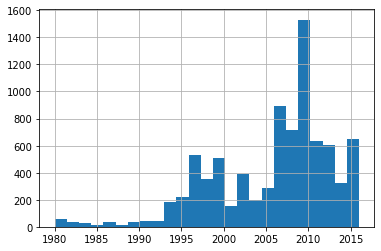

In [13]:
# посмотрим в какие года выпускали игры, у которых нет рейтинга
games.query('critic_score.isna()')['year_of_release'].hist(bins = 25)

In [14]:
# сформируем столбец общих продаж, что бы оценить их для игр без оценок
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games.query('critic_score.isna()').sort_values(by = 'total_sales', ascending = False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


Видим, что 
- игры без оценок чаще всего встречаются в данных за 2010 год и более ранние года.
- ТОП по продажам игр без оценок - это в основном старые игры, в 15-ти самых продаваемых только одна игра 2015 года, остальные более ранние
- Также много игр без оценок в 15-16 годах, это может объясняться тем, что по свежим играм еще не сформированы оценки

Исходя из этого, а тажке предыдущего вывода о невозможности заполнить рейтинг по аналогам, на данном этапе исследования оставлю эти пропуски со значением NaN.

`Причинами появления пропусков в этих столбцах могут быть:`
- так как данные брали из открытых источников, возможно этих данных нет в открытом доступе
- такие сайты как  Метакритик или IGN , агрегирующие оценки критиков игр появились только в начале 2000-х годов
- для современных игр возможная причина отсутствия оценок - недостаточное количество оценок игры. Так например на Metacritic у игры должно быть не менее 15 обзоров, что бы сформировалась оценка 

Аналогичный вывод и действие, точнее бездействие, на мой взгляд справедливо и для столбца "user_score", но он в данных о таблице имел тип object, что странно.

In [15]:
# посмотрим какие значения есть в этом столбце
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Видим значение tbd. Посмотрим, что это за строки и сколько их.

In [16]:
games.query('user_score == "tbd"').sort_values(by = 'total_sales', ascending = False)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E,6.70
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+,3.97
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T,2.81
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E,2.42
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E,2.24
...,...,...,...,...,...,...,...,...,...,...,...,...
15983,Mission: Impossible - Operation Surma,GC,2004.0,Platform,0.01,0.00,0.0,0.00,64.0,tbd,T,0.01
15979,Monster Trux Offroad,Wii,2007.0,Racing,0.01,0.00,0.0,0.00,NaN,tbd,E,0.01
15975,Paranormal Pursuit: The Gifted One,PC,2015.0,Action,0.00,0.01,0.0,0.00,NaN,tbd,NaN,0.01
15963,Dead to Rights,GBA,2004.0,Shooter,0.01,0.00,0.0,0.00,40.0,tbd,T,0.01


Аббревиатура tbd означает, что рейтинг еще не сформировался, и в данных мы видим, что это игры с небольшими продажами и достаточно старые, что и объясняет отсутствие рейтинга. 

Заменим это значение на NaN для дальнейшей обработки

In [17]:
# заменим значение tbd на Nan
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games.query('user_score == "tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales


И посмотрим на столбец рейтинга, где также было много пропусков.

In [18]:
# выведем игры без рейтинга отсортированные по общим продажам
games.query('rating.isna()').sort_values(by = 'total_sales', ascending = False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN,30.26
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN,28.31
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN,24.67
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN,23.09
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN,20.62
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN,18.24
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN,18.14
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN,17.28


In [19]:
# выведем тоже самое, но выпущенное после 2012 года
games.query('rating.isna() and year_of_release > 2012').sort_values(by = 'total_sales', ascending = False).head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
72,Minecraft,X360,2013.0,Misc,5.70,2.65,0.02,0.81,NaN,NaN,NaN,9.18
87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
96,Super Smash Bros. for Wii U and 3DS,3DS,2014.0,Fighting,3.27,1.37,2.43,0.48,NaN,NaN,NaN,7.55
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
108,Pokemon Sun/Moon,3DS,2016.0,Role-Playing,2.98,1.45,2.26,0.45,NaN,NaN,NaN,7.14
180,Minecraft,PS3,2014.0,Misc,2.03,2.37,0.00,0.87,NaN,NaN,NaN,5.27
184,Tomodachi Life,3DS,2013.0,Simulation,0.97,2.11,1.90,0.24,NaN,NaN,NaN,5.22


In [20]:
# посмотрим на другие версии самой популярной игры
games.query('name == "Call of Duty: Black Ops 3"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NaN,7.39
1049,Call of Duty: Black Ops 3,X360,2015.0,Shooter,1.14,0.40,0.00,0.16,NaN,NaN,NaN,1.70
1062,Call of Duty: Black Ops 3,PS3,2015.0,Shooter,0.49,0.87,0.07,0.26,NaN,NaN,NaN,1.69
6463,Call of Duty: Black Ops 3,PC,2015.0,Shooter,0.00,0.25,0.00,0.01,NaN,NaN,NaN,0.26


Один из выводов из данной таблицы - в общем датафрейме есть, или уже обработаны, данные таким образом, что мы видим продажи игры только в год ее релиза, в то время как наверняка игра могла продаваться и в течении нескольких следующих лет после выпуска.

К сожалению и здесь прихожу к выводу, что корректной и логичной замены отстутствующим значениям нет. Заполнять эти данные медианой или средним - неверно. Как показывает пример Call of Duty заполнить данные по другим платформам тоже нет возможности.

Однако так как рейтинг игре может быть присвоен и без продаж вообще, но по какой-то причине этих данных нет в таблице, то для данного столбца заполним пропуски значением 'no_rating' 

In [21]:
games['rating'] = games['rating'].fillna('no_rating')
# games.query('rating.isna()')

In [22]:
# и последнее на данном этапе преобразование - столбец года необходимо привести к целому
games['year_of_release'] = games['year_of_release'].astype('int')
games['user_score'] = games['user_score'].astype('float')
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  total_sales      16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


In [23]:
# и проверим получившийся датасет на дупликаты
games.duplicated().sum()

0

Дупликатов в датасете нет.

На этом предобработка данных завершена.

## **Исследовательский анализ даных** <a id = 'ИАД'></a> 

### Первая задача - посмотреть сколько игр выпускалось в разные годы , ответить на вопрос - важны ли данные за все периоды

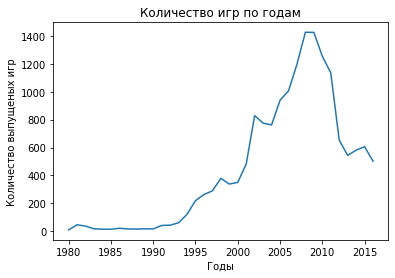

In [24]:
# для этого сгруппируем датасет по годам с подсчетом количества игр и построим график 

games.groupby('year_of_release')['total_sales'].count().plot()

plt.title('Количество игр по годам')
plt.xlabel('Годы')
plt.ylabel('Количество выпущеных игр')
plt.show()

График показывает, что с 1980 по 1992 годы количество игр было небольшим и не росло. С 1993 года начался значительный рост и в 2008-2009 году количество игр достигло своего пика, после чего начался спад, продолжающийся до сих пор.

В этом графике учтены одинаковые игры, выпускавшиеся для разных платформ. Посмотрим на аналогичное распределение уникальных игр.

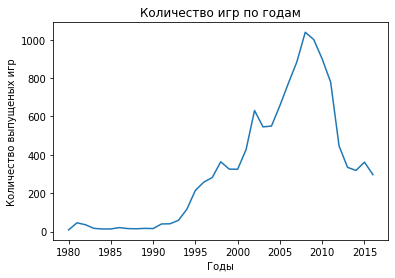

In [25]:
# создадим временный датафрейм в котором сгруппируем игры по году и названию,
# таким образом во временном датафрейме останутся только уникальные названия
df = games.groupby(['year_of_release', 'name'])['total_sales'].count().reset_index()

# и потом сгруппируем новый дф по году, подсчитав количество названий, получив таким образом количество уникальных игр в каждый год
df.groupby('year_of_release')['name'].count().plot()

plt.title('Количество игр по годам')
plt.xlabel('Годы')
plt.ylabel('Количество выпущеных игр')
plt.show()

Даже с учетом только уникальных игр график их количества по годам выглядит аналогичным образом, только пик в районе 1000 игр в год, тогда как игры для всех платформ выпускались до 1400 в год на пике.

**Основной вывод из этих графиков** - рассматривать все года не имеет смысла. Похоже что рынок игр достигнув пика в 2008-09 годах начал переживать падение, в котором и находится до сих пор. Для нашего исследования это означает, что мы можем рассматривать период с 2010 года по текущее время, так как поведение игр в этот период наиболее релевантно ближайшему будущему.

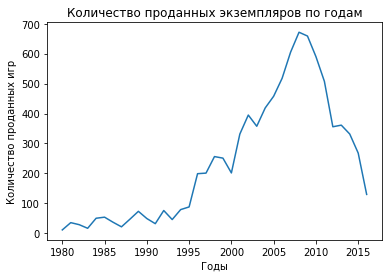

In [26]:
# посмотрим на общие объемы продаж по годам

games.groupby('year_of_release')['total_sales'].sum().plot()

plt.title('Количество проданных экземпляров по годам')
plt.xlabel('Годы')
plt.ylabel('Количество проданных игр')
plt.show()

У меня было предположение, что количество игр перешло в качестро и начали продавать больше копий меньшего количества игр, но это не так, количества проданных игр падают аналогично количеству выпускаемых. Для нас это также подтверждение, что есть смысл рассматривать только период с 2010 по текущее время.

### Следующая задача - посмотреть как менялись продажи по платформам

Необходимо выбрать платформы с наибольшими суммарными продажами и для них построить распределение по годам.


In [27]:
# для выбора платформ с наибольшими продажами применим функцию группировки по платформе с подсчетом количества проданных экз
top_platform = games.groupby('platform')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', 
                                                                                       ascending = False)
#top_platform.columns = ['platform', 'sales']
display(top_platform)
top_platform.describe()

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


,total_sales
count,31.000000
mean,284.334516
std,343.954144
min,0.030000
25%,22.150000
50%,200.040000
75%,301.205000
max,1233.560000


Для дальнейшего анализа возьмем платформы с продажами выше среднего в 284,3 млн экземпляров. В этот список попадет 9 самых популярных платформ

In [28]:
# оставим в переменной top_platform только платформы с общими продажами более 284 млн экз
top_platform = top_platform.query('total_sales > 284')
# и из общих данных оставим только данные по продажам ТОП платформ
top_patform_data = games.query("platform in @top_platform['platform'].unique()")
display(top_patform_data)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,NaN,NaN,no_rating,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01


In [29]:
# сформируем таблицу с продажами по годам и платформам по годам, колонки - платформы, суммируя общие продажи

sales_by_platform = top_patform_data.pivot_table(index = ['year_of_release'], columns = 'platform', 
                                     values = 'total_sales', aggfunc = 'sum' ).reset_index()
# заполним пропуски нулями
sales_by_platform = sales_by_platform.fillna(0)

display(sales_by_platform)

platform,year_of_release,DS,GBA,PS,PS2,PS3,PS4,PSP,Wii,X360
0,1985,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1994,0.00,0.00,6.03,0.00,0.00,0.00,0.00,0.00,0.00
2,1995,0.00,0.00,35.96,0.00,0.00,0.00,0.00,0.00,0.00
3,1996,0.00,0.00,94.70,0.00,0.00,0.00,0.00,0.00,0.00
4,1997,0.00,0.00,136.17,0.00,0.00,0.00,0.00,0.00,0.00
5,1998,0.00,0.00,169.49,0.00,0.00,0.00,0.00,0.00,0.00
6,1999,0.00,0.00,144.53,0.00,0.00,0.00,0.00,0.00,0.00
7,2000,0.00,0.07,96.37,39.17,0.00,0.00,0.00,0.00,0.00
8,2001,0.00,61.53,35.59,166.43,0.00,0.00,0.00,0.00,0.00
9,2002,0.00,74.16,6.67,205.38,0.00,0.00,0.00,0.00,0.00


Список сформирован, теперь мы знаем какие продажи были у каждой платформы по годам. Теперь необходимо графически отобразить эти продажи, что бы можно было ответить на вопрос - "За какой характерный срок появляются новые и исчезают старые платформы?"

<function matplotlib.pyplot.show(close=None, block=None)>

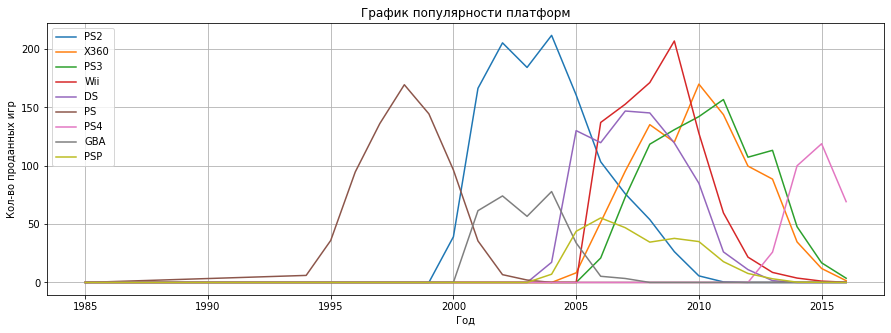

In [30]:
# зададим размер нашего графика
plt.figure(figsize=(15, 5))

# для построения графиков осью Х выберем года
x = sales_by_platform['year_of_release']

# в качестве Y нам нужны продажи по платформам
# так как платформ несколько, напишем цикл перебора ТОП платформ 
for y in top_platform['platform'].unique():
    plt.plot(x, sales_by_platform[y], label = y)

plt.title('График популярности платформ')  # подпись графика
plt.xlabel('Год')  # ось Х
plt.ylabel('Кол-во проданных игр')   # ось Н 
plt.legend()  # вывод подписей линий графика
plt.grid()  # выведем решетку

plt.show

**Выводы из графиков продаж по платформам**
- до 1994 года не было игровых платформ  с большими продажами игр к ним
- после появления платформы продажи игр к ней растут 3-4 года, 4-5 года эти пики популярности, после этого продажи начинают снижаться
- средний срок существования игровой платформы - около 8 лет

### Следующий шаг в исследовании - определение актуального периода для дальнейшего анализа
Сейчас мы находимся в конце 2016 года, и цель исследования - определение стратегии на 2017 год. 

С учетом выводов из первого блока исследования, в котором говорилось, что с 2010 года общие продажи игр падают, а также с учетом того, что платформы существуют около 8 лет, из которых первая половина это рост продаж, а вторая - падение, считаю что для дальнейшего ислледования можно оставить только продажи после 2010 года. Таким образом в исследование попадут продажи, соответствующие текущему поведению рынка игр, и платформы, находящиеся еще в активной фазе существования

In [31]:
# из общего датафрейма выделим те игры, которые продавались после 2010 года включительно
actual_platform = games.query('year_of_release > 2012')  # ранее было > 2009 года
actual_platform.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


В рассматриваемом периоде определим лидера продаж, а также тенденцию

In [32]:
# сгруппируем продажи по платформам и отсортируем по убыванию продаж
actual_top_platform = actual_platform.groupby('platform')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', 
                                                                                       ascending = False)
actual_top_platform.head(10)

,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


Видим, каки платформы наиболее популярны за последине **АПДЕЙТ 4  года**, но для понимания какие из них продолжают расти, а какие падают в продажах сформируем сводную таблицу по продажам и построим график только для этих платформ

In [33]:
# сформируем сводную таблицу общих продаж по годам и платформам из данных по продажам с 2010 года
actual_platform_pivot = actual_platform.pivot_table(index = ['year_of_release'], columns = 'platform', 
                                     values = 'total_sales', aggfunc = 'sum' ).reset_index()
actual_platform_pivot.head(10)

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSP,PSV,Wii,WiiU,X360,XOne
0,2013,56.57,1.54,12.38,113.25,25.99,3.14,10.59,8.59,21.65,88.58,18.96
1,2014,43.76,NaN,13.28,47.76,100.00,0.24,11.90,3.75,22.03,34.74,54.07
2,2015,27.78,NaN,8.52,16.82,118.90,0.12,6.25,1.14,16.35,11.96,60.14
3,2016,15.14,NaN,5.25,3.60,69.25,NaN,4.25,0.18,4.60,1.52,26.15


<function matplotlib.pyplot.show(close=None, block=None)>

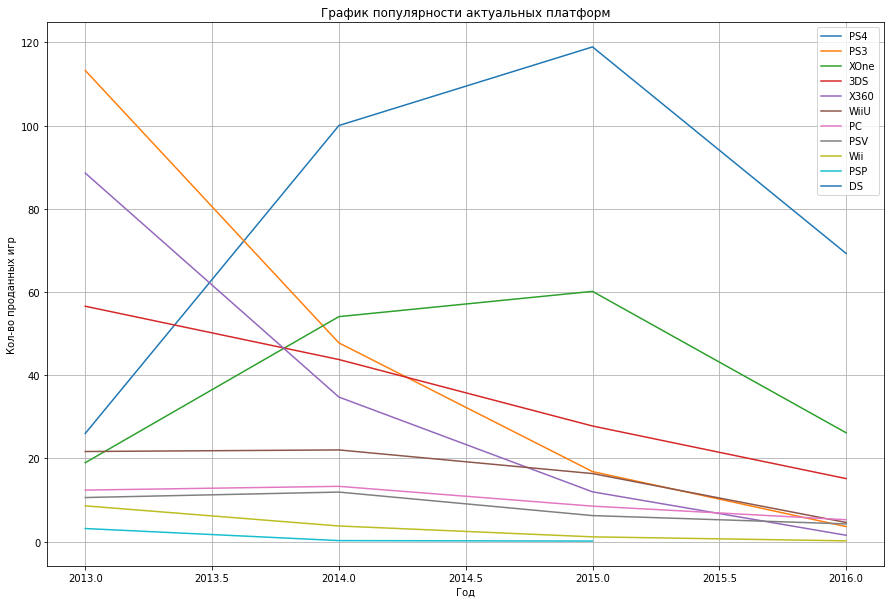

In [34]:
# зададим размер нашего графика
plt.figure(figsize=(15, 10))

# для построения графиков осью Х выберем года
x = actual_platform_pivot['year_of_release']

# в качестве Y нам нужны продажи по платформам
# так как платформ несколько, напишем цикл перебора ТОП платформ 
for y in actual_top_platform['platform'].unique():
    plt.plot(x, actual_platform_pivot[y], label = y)

plt.title('График популярности актуальных платформ')  # подпись графика
plt.xlabel('Год')  # ось Х
plt.ylabel('Кол-во проданных игр')   # ось Н 
plt.legend()  # вывод подписей линий графика
plt.grid()  # выведем решетку

plt.show

Из графиков продаж по актуальным платформам мы видим, что самые популярные из них - это PS4 и XOne, остальные платформы находятся на последних стадиях существования. Графики показывают снижение их продаж, но  мы смотрим на них в конце 2016 года, а значит данные за этот год наверняка неполные. Зная, что платформы "живут" около 8 лет, и пик популярности приходится на 4-5-й года платформы, можем сделать вывод, что 2016 должен стать одним из лучших для PS4 и XOne,  в 2017 году следует уделить внимание продаже игр именно для этих консолей, а также возможно ожидать появления нового поколения консолей.

Построим "ящик с усами" для самых популярных платформ.

(0.0, 17.0)

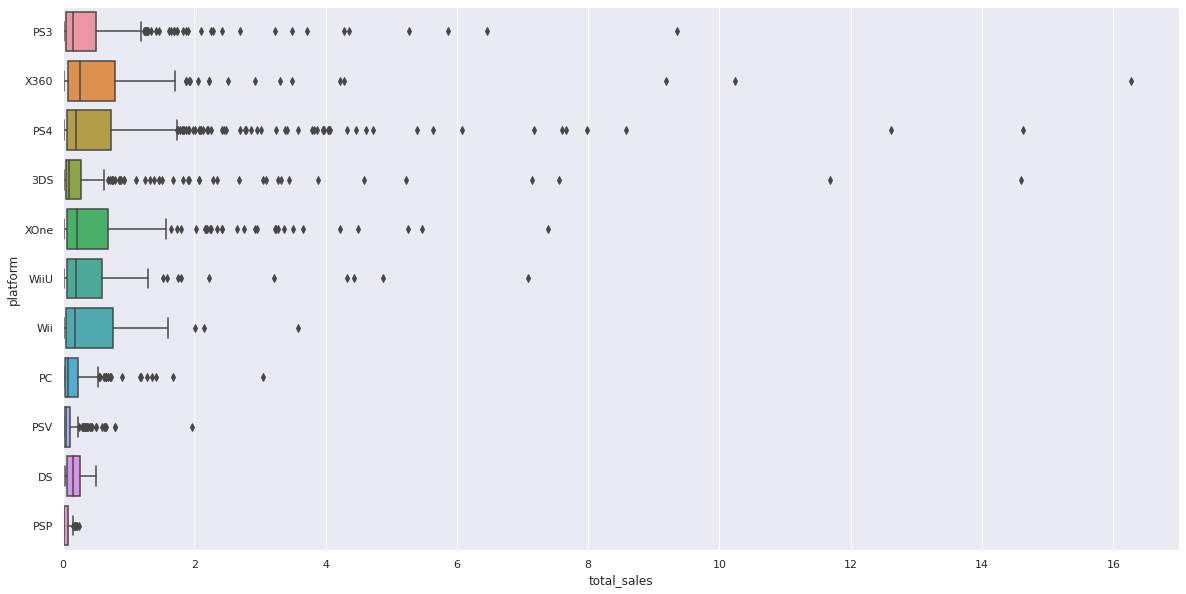

In [35]:
# установим размеры графика
sns.set(rc={'figure.figsize':(20,10)})
# и выведем график разброса для каждой платформы по общим продажам
sns.boxplot(x = actual_platform['total_sales'], y = actual_platform['platform']).set_xlim(0, 17)

Для всех платформ, игры для которых продавались после 2009 года характерно большое количество выбросов на графике разброса и невысокое относительно этих выбросов медианное значение. Это означает, что для всех платформ выходит большое количество игр с очень небольшими продажами, менее 0,2-0,3 млн экземпляров, но большую часть продаж делают отдельные игры-хиты.

(0.0, 17.0)

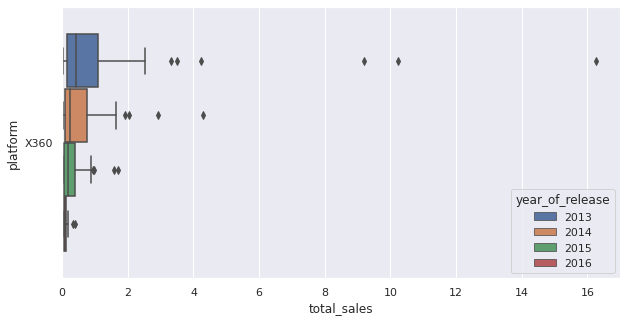

In [36]:
# для чуть более глубокого анализа посмотрим на график разброса для одной из платформ по годам
XB360 = actual_platform.query('platform == "X360"')
# установим размеры графика
sns.set(rc={'figure.figsize':(10,5)})
# и выведем график разброса для каждой платформы по общим продажам
sns.boxplot(x = XB360['total_sales'], y = XB360['platform'], hue = actual_platform['year_of_release']).set_xlim(0, 17)

В целом мы видим аналогичное распределение - в каждый год выпускаются игры, которые имеют минимальные продажи, и при этом в каждый год есть какое-то количество хитов. И, как мы видели на общем распределении продаж, после 2013 года и общий объем продаж и количество хитов - снижаются.

Посмотрим, как влияют на продажи отзывы пользователей и критиков. Для анализа возьмем платформу PS4, как современную платформу с высокими продажами.

In [37]:
# сформируем датафрейм с играми для PS4
ps4_sales = actual_platform.query('platform == "PS4"')
ps4_sales.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


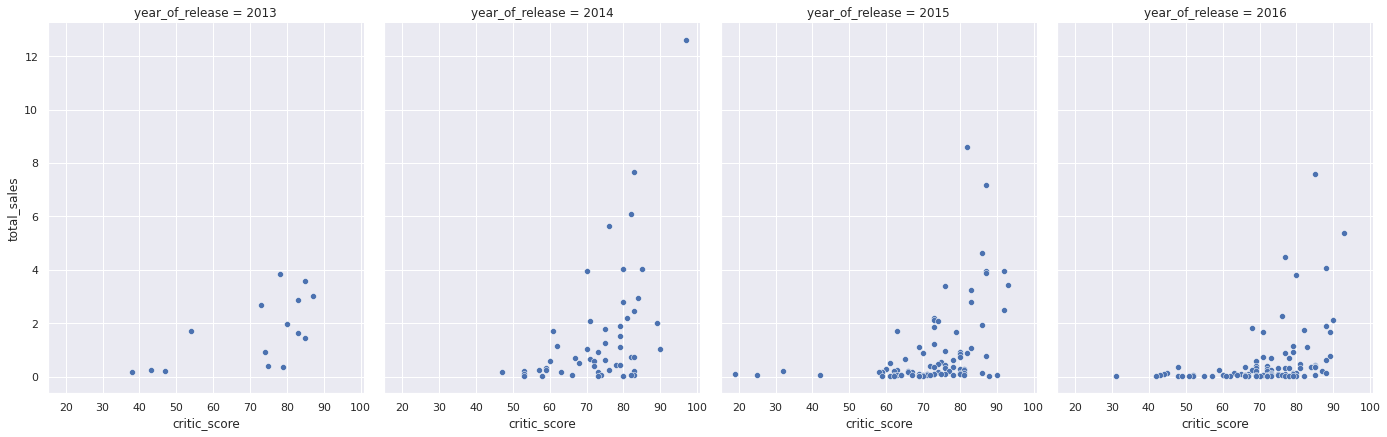

In [38]:
# построим диаграмму рассеивания для отображения зависимости продаж от оценок критиков и пользователей
# методом seaborn, по оси х будет оценка критиков, по оси У - общие продажи игры
# и разделим графики на отдельные года, так как мы знаем, что в последние годы продажи падают
sns.relplot(x='critic_score', y='total_sales', col = 'year_of_release',  data=ps4_sales, height = 6, aspect = 0.8);

Выводы по зависимости продаж от оценок критиков:
- какой-то единой зависимости не прослеживается
- что бы иметь шанс быть проданной более 2 миллионнами копий игра должна иметь оценку критиков не менее 70
- но есть большое количество игр с оценками более 70, вплоть до 90, с продажами менее 200 тыс экземпляров (но мы помним, что речь идет только про продажи в год релиза)
- оценка критиков в 90 и более почти всегда гарантирует продажи от 1 до 4 млн копий, но есть исключения
- хитами, с продажами более 4 млн копий имеют шанс стать игры с оценками 80 и выше.

Итого, если надо выбирать игры для будущих продаж, оценка критиков должна быть не менее 80

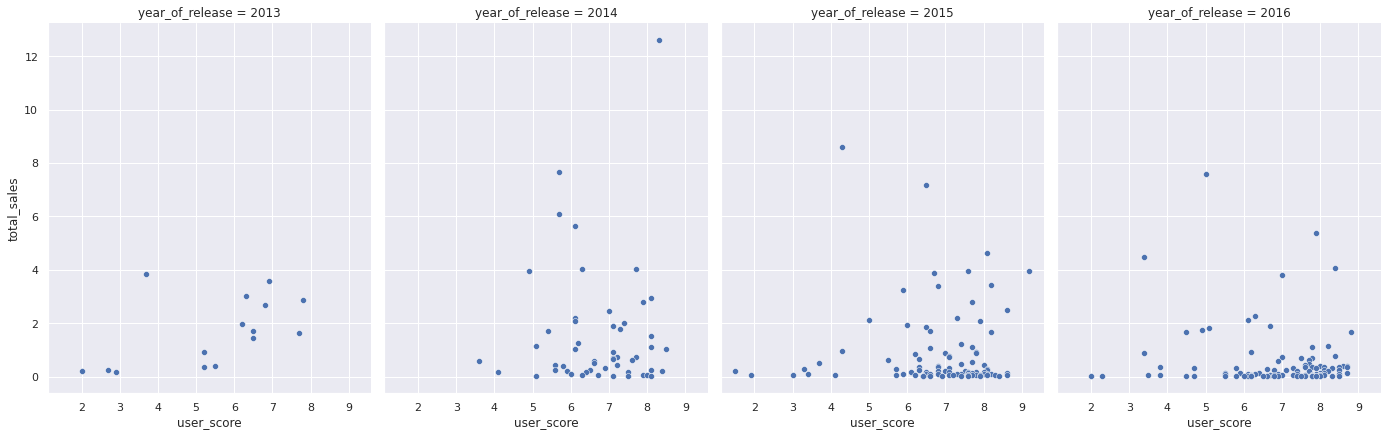

In [39]:
# построим аналогичные диаграммы для оценок пользователей
sns.relplot(x='user_score', y='total_sales', col = 'year_of_release',  data=ps4_sales, height = 6, aspect = 0.8);

Выводы по зависимости продаж от оценок пользователей:
- также не видно какой-то единой однозначной зависимости
- более того, разброс значений выше, чем у критиков. Так например игры с 2 млн проданных копий могут иметь более широкий разброс оценок от пользователей, начиная от 5, что соответствует 50 у критиков, тогда как у критиков минимум 70 должно быть для преодоления этого порога
- даже у игр, проданных более 4 и вплоть до 8 млн копий, могуть быть низкие оценки
- высокие, выше 8 оценки, не гарантируют высоких продаж игры

Проверим эти выводы из графиков на коэффициенте корреляции.

In [40]:
# посчитаем корреляцию для платформы PS4 для критиков и пользователей
display('К-т корреляции между оценками критиков и продажами =', ps4_sales['critic_score'].corr(ps4_sales['total_sales']))
display('К-т корреляции между оценками пользователей и продажами =',ps4_sales['user_score'].corr(ps4_sales['total_sales']))

'К-т корреляции между оценками критиков и продажами ='

0.4065679020617816

'К-т корреляции между оценками пользователей и продажами ='

-0.031957110204556424

In [41]:
# посмотрим на к-т корреляции для всех актуальных платформ
display('К-т корреляции между оценками критиков и продажами =', actual_platform['critic_score'].corr(actual_platform['total_sales']))
display('К-т корреляции между оценками пользователей и продажами =',actual_platform['user_score'].corr(actual_platform['total_sales']))

'К-т корреляции между оценками критиков и продажами ='

0.31369951510273675

'К-т корреляции между оценками пользователей и продажами ='

-0.002607813354598264

In [42]:
# для сравнения влияния оценок с другими платформами сформируем датафрейм из ТОП-5 платформ, но без PS4
non_ps4_sales = actual_platform.query('platform in ["XOne", "PS3", "3DS", "X360", "WiiU"]')
non_ps4_sales.head()


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,no_rating,14.60
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
60,Call of Duty: Ghosts,X360,2013,Shooter,6.73,2.56,0.04,0.91,73.0,2.6,M,10.24


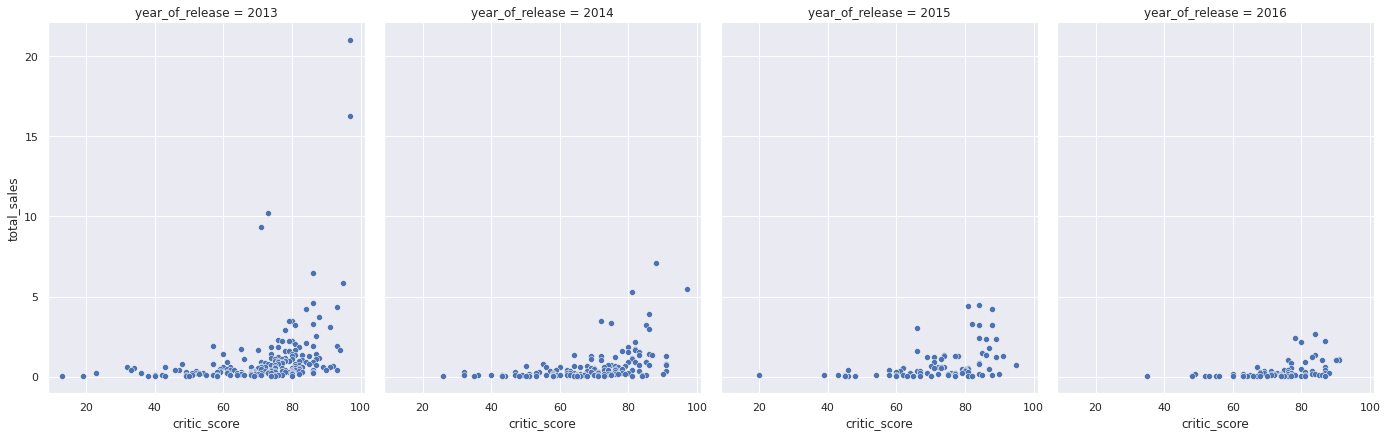

In [43]:
# построим диаграмму рассеивания для отображения зависимости продаж от оценок критиков и пользователей
# методом seaborn, по оси х будет оценка критиков, по оси У - общие продажи игры
# и разделим графики на отдельные года, так как мы знаем, что в последние годы продажи падают
sns.relplot(x='critic_score', y='total_sales', col = 'year_of_release',  data=non_ps4_sales, height = 6, aspect = 0.8);

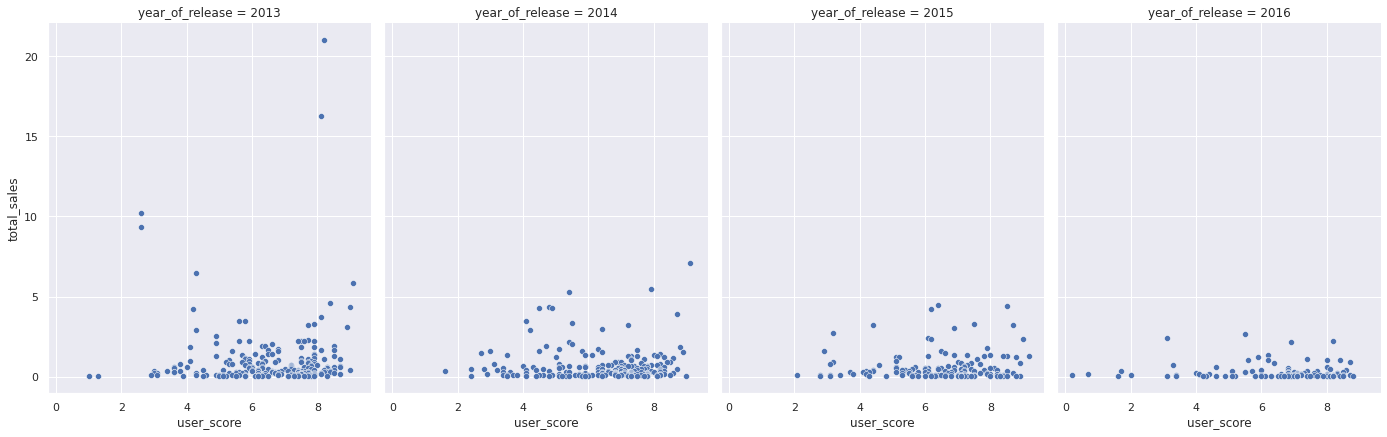

In [44]:
# построим аналогичные диаграммы для оценок пользователей
sns.relplot(x='user_score', y='total_sales', col = 'year_of_release',  data=non_ps4_sales, height = 6, aspect = 0.8);

In [45]:
# посчитаем корреляцию для других популярных платформ для критиков и пользователей
display('К-т корреляции между оценками критиков и продажами =', non_ps4_sales['critic_score'].corr(non_ps4_sales['total_sales']))
display('К-т корреляции между оценками пользователей и продажами =',non_ps4_sales['user_score'].corr(non_ps4_sales['total_sales']))

'К-т корреляции между оценками критиков и продажами ='

0.3376881440455177

'К-т корреляции между оценками пользователей и продажами ='

0.023683937683561276

**Выводы по соотношению влияния оценок критиков и пользователей на другие платформы в сравнении с PS4**
И графики и к-ты корреляции показывают, что картина принципиально идентична для PS4 и для других популярных платформ. К-т корреляции с оценками критиков у платформ кроме PS4 ниже, чем у PS4, предположу это из-за меньшей популярности самих платформ, и соответственно некоторого количества игр с высокими оценками критиков и низкими продажами в силу низких продаж всех игр для платформы. Но в целом можно сказать, что оценка критиков выше 80 почти всегда означает высокие продажи игры.

Оценки пользователей как для PS4, так и для других платформ не влияют на продажи. Игры с высокими продажами могут быть как высоко, так и низко быть оцененными пользователями.

И нам осталось посмотреть на распределение игр по жанрам, выявить самые прибыльные жанры. Для этого из датафрейма актуальных платформ сгруппируем

In [46]:
# для этого сгруппируем игры из актуального периода (после 2009 года) по жанрам, просуммируем общий
# объем продаж и отсортируем по объему
actual_platform.groupby('genre')['total_sales'].sum().reset_index().sort_values(by = 'total_sales', 
                                                                                       ascending = False)

,genre,total_sales
0,Action,321.87
8,Shooter,232.98
10,Sports,150.65
7,Role-Playing,145.89
3,Misc,62.82
4,Platform,42.63
6,Racing,39.89
2,Fighting,35.31
1,Adventure,23.64
9,Simulation,21.76


Самыми популярными в рассматриваемом периоде являются игры жанра Action, опережая следующую по популярности категорию Shooter на 40%. Шутеры в свою очередь на примерно 40% опережают игры категорий Спорт и Role-Playing. В целом мы видим существенную разницу между разными категориями игр, что можно использовать при определении стратегий продвижения в будущем.

Также посмотрим на диаграммы для различных категорий, что бы увидеть графическое представление данных.

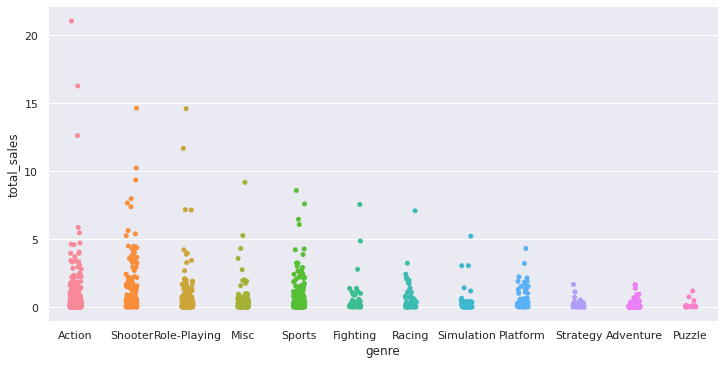

In [47]:
sns.catplot(x='genre', y='total_sales',  data=actual_platform, height = 5, aspect = 2);

На диаграмме мы можем видеть в каких жанрах бывают и как часто встречаются супер хитовые игры. Так например видно, что лучшая игра по продажам принадлежит жанру Misc. В жанре Action, который лидирует по общему числу игр, были три супер хита, проданные более чем 12 млн экземпляров, а остальная масса игр продается менее 8 млн. А жанр Shooter не имеет супер хитов с продажами более 15 млн, зато сразу 8 игр были проданы от 10 до 15 млн копий.

## **Составление портрета пользователя** <a id = 'пользователь'></a> 

Необходимо определить для каждого региона (NA, EU, JP):
- самые популярные платформы (ТОП-5)
- самые популярные жанры (ТОП-5)

А также выяснить, влияет ли рейтинг игры ESRB  на продажи игры в регионе.

In [48]:
# сгруппируем датафрейм actual_platform по продажам в разных регионах
for a in ['na_sales', 'eu_sales', 'jp_sales']:
    display(actual_platform.groupby('platform')[a].sum().reset_index().sort_values(by = a, 
                                                                               ascending = False).head())

,platform,na_sales
4,PS4,108.74
10,XOne,93.12
9,X360,81.66
3,PS3,63.50
0,3DS,38.20


,platform,eu_sales
4,PS4,141.09
3,PS3,67.81
10,XOne,51.59
9,X360,42.52
0,3DS,30.96


,platform,jp_sales
0,3DS,67.81
3,PS3,23.35
6,PSV,18.59
4,PS4,15.96
8,WiiU,10.88


Видны существенные различия на разных рынках:
- на рынке северной америки лидирует c существенным отрывом X360, на втором месте PS3, новые платформы PS4 и XOne уже вошли в ТОП5
- на рынке европы лидеры американского рынка меняются между собой местами, в ТОП5 есть игры для PC, чего не было в америке, XOne не вошел в ТОП5
- Рынок японии значительно отличается от американского и европейского рынков. Главное - четыре из пяти платформ это мобильные платформы, и только PS3 присутствует из стационарных платформ. По этой причине в ТОП5 не вошли игры для обоих поколений XBox, не вошли игры для Wii и PS4,  присутствующие в двух других топах

Сделаем аналогичный срез по жанрам

In [49]:
# сгруппируем датафрейм actual_platform по продажам в разных регионах
for a in ['na_sales', 'eu_sales', 'jp_sales']:
    display(actual_platform.groupby('genre')[a].sum().reset_index().sort_values(by = a, 
                                                                               ascending = False).head())

,genre,na_sales
0,Action,126.05
8,Shooter,109.74
10,Sports,65.27
7,Role-Playing,46.40
3,Misc,27.49


,genre,eu_sales
0,Action,118.13
8,Shooter,87.86
10,Sports,60.52
7,Role-Playing,36.97
6,Racing,20.19


,genre,jp_sales
7,Role-Playing,51.04
0,Action,40.49
3,Misc,9.20
2,Fighting,7.65
8,Shooter,6.61


По жанрам предпочтения на рынках следующие:
~~- на американском и европейском рынках предпочитают одни и те же жанры. ТОП3 полностью аналогичен на обоих рынках, 4 и 5 места распределены по другому, но сами жанры аналогичны и разрыв между ними небольшой
~- японский рынок отличается от них. В ТОПе нет игр-шутеров, а лидером является Role-Playing, которые в америке и европе был на 4-5 местах. Также в Японии популярны игры в жанрах Platform  и Adventure, которые не входят в ТОПы америки и европы~~

**Апдейт выводов после обновления актуального периода**
- ТОП 4 жанров в северной америке и европе совпадает, геймеры играют в одни и теже игры. Отличие есть для 5-го места, в америке играют в игры Platform, а в Европе Racing. Но понятно, на чем нужно сосредотачивать усилия маркетологов на обоих рынках.
- в Японии распределение иное. Самый популярный жанр также Action, но Shooter только на третьем месте по популярности с трехкратным отставанием от первого места. Role-Playing который на других рынках сильно отстает по продажам от лидеров, в Японии на втором месте. Маркетинговая политика для рынка Японии должна быть иная, относительно европейского и американского рынков.

Проверим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

Опишем рейтинги и их значение:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»

In [50]:
# сгруппируем датафрейм actual_platform по продажам в разных регионах
# пройдем в цикле по продажам каждого региона
for a in ['na_sales', 'eu_sales', 'jp_sales']:
    display(actual_platform.groupby('rating')[a].sum().reset_index().sort_values(by = a, 
                                                                               ascending = False).head())

,rating,na_sales
2,M,165.21
4,no_rating,89.42
0,E,79.05
1,E10+,54.24
3,T,49.79


,rating,eu_sales
2,M,145.32
0,E,83.36
4,no_rating,78.91
1,E10+,42.69
3,T,41.95


,rating,jp_sales
4,no_rating,85.05
3,T,20.59
0,E,15.14
2,M,14.11
1,E10+,5.89


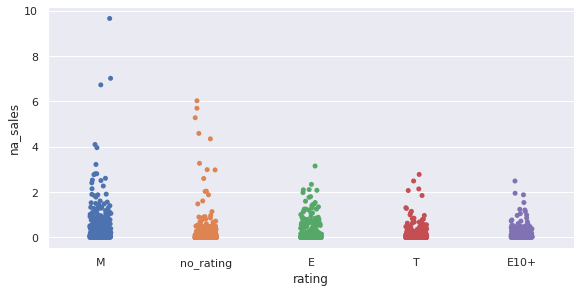

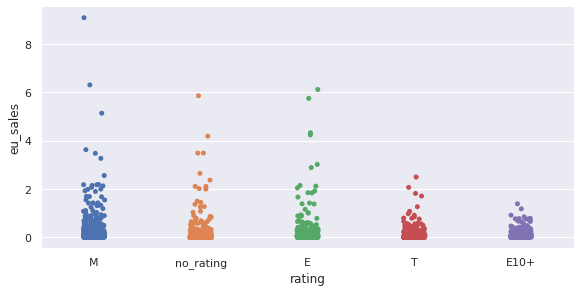

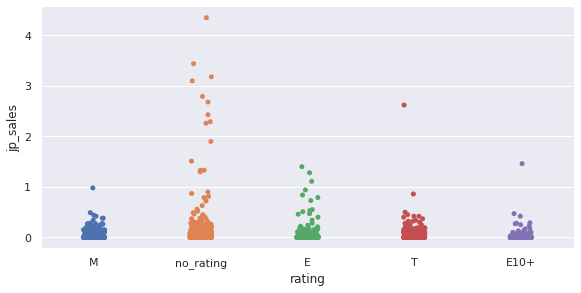

In [51]:
# и посмотрим на графическое представление этого распределения
for a in ['na_sales', 'eu_sales', 'jp_sales']:
    sns.catplot(x='rating', y=a,  data=actual_platform, height = 4, aspect = 2)

Выводы по влиянию рейтинга на продажи:
- на американском и европейском рынках больше всего игр продается в категориях Для всех и Для взрослых
- также в обоих этих ТОПах присутствуют игры для подростков и детей старше 10 лет
- в целом рынки америки и европы можно назвать похожими
- в обоих рейтингах присутствуют игры Без рейтинга. Мы заполняли этим значением значения tbd. Это выглядит несколько странно, что игры, попадающие в ТОП 5 по продажам не имеют рейтинга. 
- на японском рынке игры без рейтинга занимают первое место в ТОПе, при этом в Японии существует собственная рейтинговая организация CERO, оценок которой в датасете нет.

## **Проверка гипотез** <a id = 'гипотезы'></a> 

Необходимо проверить две гипотезы:
•	Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
•	Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


Сформулируем нулевую гипотезу для первого утверждения: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые". Тогда альтернативная гипотеза будет звучать так: "Средние пользовательские рейтинги платформ Xbox One и PC отличаются друг от друга"

In [52]:
# перед работой с проверкой гипотез уберем из датафрейма строки, где нет значений
# даже на данном этапе ислледования я не придумал как корректно заполнить отсутствующие данные
actual_platform = actual_platform.dropna(subset = ['user_score'])

# установим критический уровень статистической значимости на уровне 0.5
alpha = 0.05
# если p-value окажется меньше него - отвергнем гипотезу

# применим медот проверки равенства двух средних
# указав параметр equal_var = False, так как мы знаем, что выборки разного размера (Игр для Хбокс больше чем для РС)
results = st.ttest_ind(actual_platform.query('platform == "XOne"')['user_score'], 
                       actual_platform.query('platform == "PC"')['user_score'],
                      equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC отличаются друг от друга")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые")



p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги платформ Xbox One и PC одинаковые


Мы не смогли отвергнуть нулевую гипотезу, данные говорят о том, если и есть отличие в рейтингах - вероятность получить такое отличие случайно - очень высока.

Сформулируем нулевую гипотезу для второго утрвеждения: "Средние пользовательские рейтинги жанров Action и Sports - одинаковые". Тогда альтернативная гипотеза будет звучать так: "Средние пользовательские рейтинги жанров Action и Sports - разные"

In [53]:
# установим критический уровень статистической значимости на уровне 0.5
alpha = 0.05
# если p-value окажется меньше него - отвергнем гипотезу

# применим медот проверки равенства двух средних
# указав параметр equal_var = False, так как мы знаем, что выборки разного размера (игр Экшен больше чем Спорт)
results = st.ttest_ind(actual_platform.query('genre == "Action"')['user_score'], 
                       actual_platform.query('genre == "Sports"')['user_score'],
                      equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports отличаются друг от друга")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports одинаковые")

p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports отличаются друг от друга


И в этом случае мы не смогли отвергнуть нулевую гипотезу, что означает что данные говорят о том, что если и есть отличие в рейтингах - вероятность получить такое отличие случайно - очень высока.

## **Общий вывод исследования** <a id = 'выводы'></a> 

**Главный вопрос исследования - определение потенциально популярного продукта для формирования рекламных кампаний на следующий год.**
По итогам исследования стоит обратить внимание на следующие факторы:
- две актуальные в данный момент платформы - PS4 и XOne. Остальные платформы находятся на спаде продаж. Возможно в следующем году появится новая платформа, которая должна будет активно расти
- игры для PC не добираются до популярности игр для игровых платформ, но при этом и не падают так стремительно после устаревания платформы
- для рынков северной америки и европы должна быть отдельная стратегия продвижения игр относительно Японии
- в северной америке и европе стоит делать упор на игры жанров Action, Shooter и Sport
- в Японии это жанры Role-Playing, Action,Misc
- рейтинг пользователей не является определяющим фактором, который может показать будет игра успешной или нет, фактически на него можно не обращать внимания
- рейтинг критиков стоит принимать во внимание, а именно ориентироваться на минимальный рейтинг 80 - такая  планка часто сопровождается высокими продажами игр. Рейтинг 90 почти всегда гарантирует высокие продажи игры
- больше всего на рынках европы и северной америки продаются игры с возрастными рейтингами "Для всех" и "Для взрослых". 
- в Японии по текущим данным больше всего игр без рейтинга, в этой стране следует ориентироваться на локальные рейтинги

- гипотезы о том, что средние рейтинги платформ РС и ХВох одинаковые, а также о том, что средние пользовательские рейтинги жанров Action и Sports одинаковые -  нашли подтверждение в данных.

- в исходных данных было много отстутствующей важной информации по рейтингам критиков и пользователей. Чем заполнить эти пропуски я так и не придумал, возможно если бы данные были полными какие-то выводы могли бы быть другими
